In [3]:
#Information about Video Games Sales data:
    #Shaped with rows and columns
    #Columnss: Rank of game based on sales, name of game, platform released on
    #Year relased , genre and publisher of game
    #Also displays sales form different regions
    #Their is also missing values in the dataset

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
data = pd.read_csv('vgsales new.csv')
data.info()
data.head()
print(f"Dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
Dataset contains 16598 rows and 11 columns.


In [6]:
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [7]:
data['Year'].fillna(data['Year'].median())

data['Publisher'].fillna('Unknown')

data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

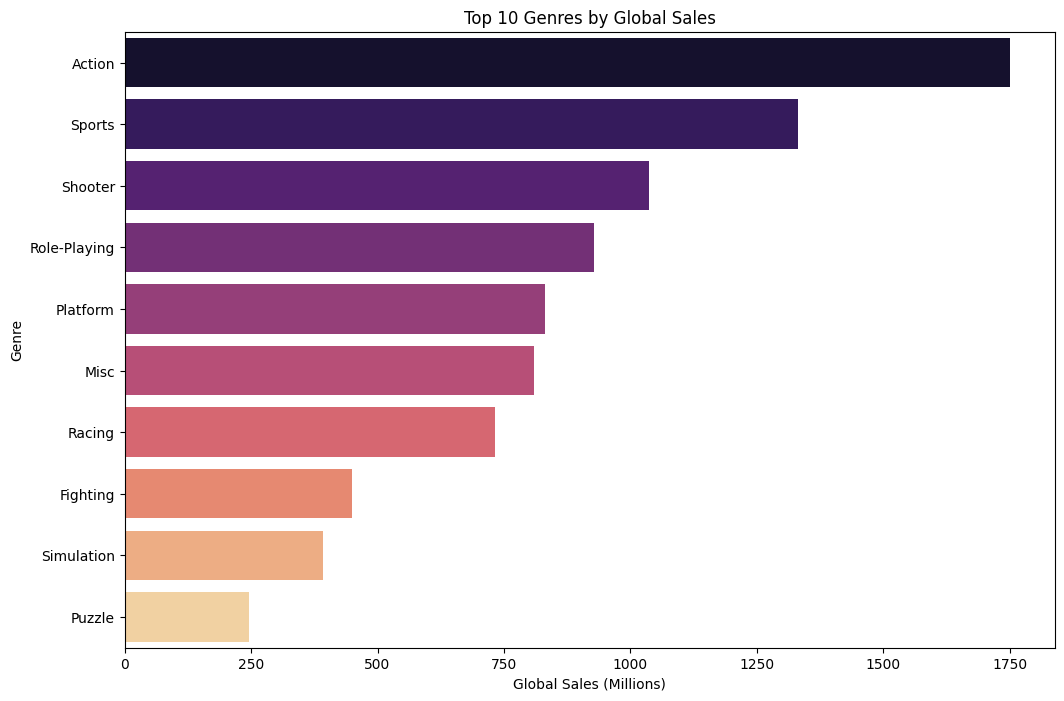

In [9]:
#Plot 1: Seaborn barplot
#Top 10 genres by global sales
top_genres = data.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(12,8))
sns.barplot(x ='Global_Sales', y='Genre', data=top_genres, hue='Genre',palette='magma' , legend=False)
plt.title('Top 10 Genres by Global Sales')
plt.xlabel('Global Sales (Millions)')
plt.ylabel('Genre')
plt.show()


In [10]:
#Description/Findings: Using this code we are looking to graph the top 10 genres by global sales.
#As findings show sports and actions games dominate the top 10. On the other hand, fighting, simulation and puzzle games make up a
#small portion of gloabl sales. This can help companies decide which genres of games to focus on and release as profits are what drives video game makers.

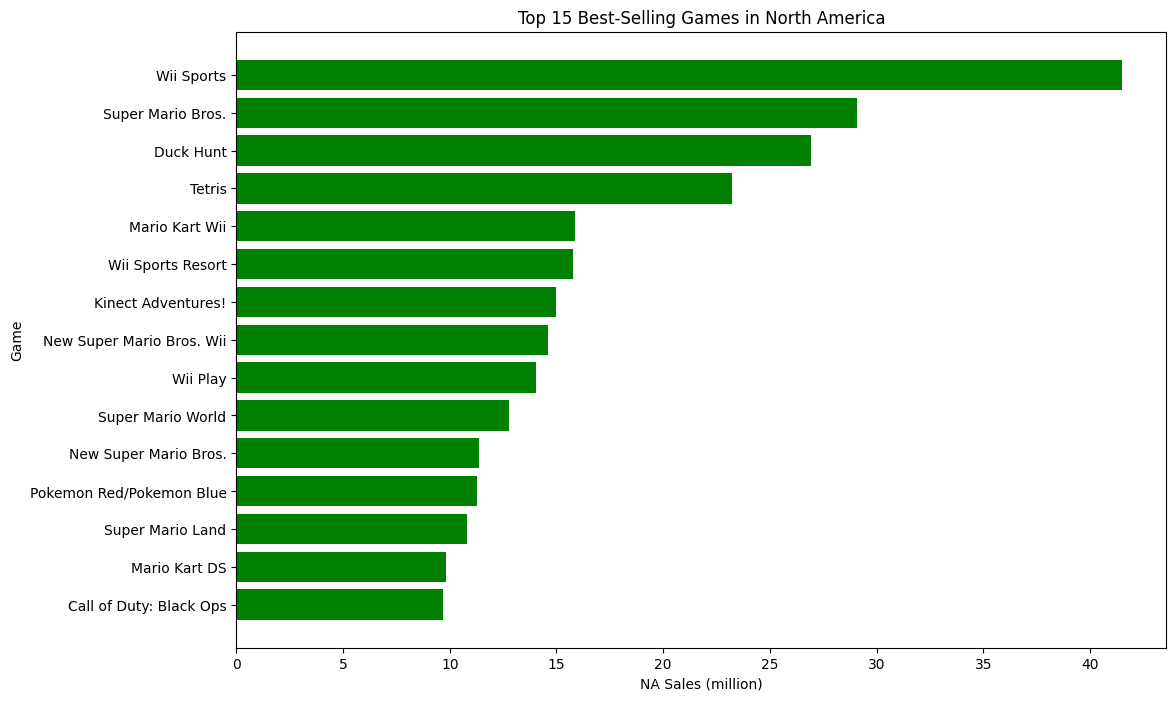

In [11]:
#Plot 2: Matplotlib Bar chart
#Top 15 games in north america by sales

top_na_games = data.nlargest(15, "NA_Sales")[["Name", "NA_Sales"]]

plt.figure(figsize=(12,8))
plt.barh(top_na_games["Name"], top_na_games["NA_Sales"], color = "green")
plt.xlabel("NA Sales (million)")
plt.ylabel("Game")
plt.title("Top 15 Best-Selling Games in North America")
plt.gca().invert_yaxis()

plt.show()

In [12]:
#Description/Findings: As we can see Nintendo makes up most of the top 15 best selling games in North America and Wii sports as a whole has
#sold more than double of 11 out of the 15 games.
#We also see how these finding align with the above graph as although that is correlating global sale, this graph stills supports what genre sells the most as most of these games are action or sports games.

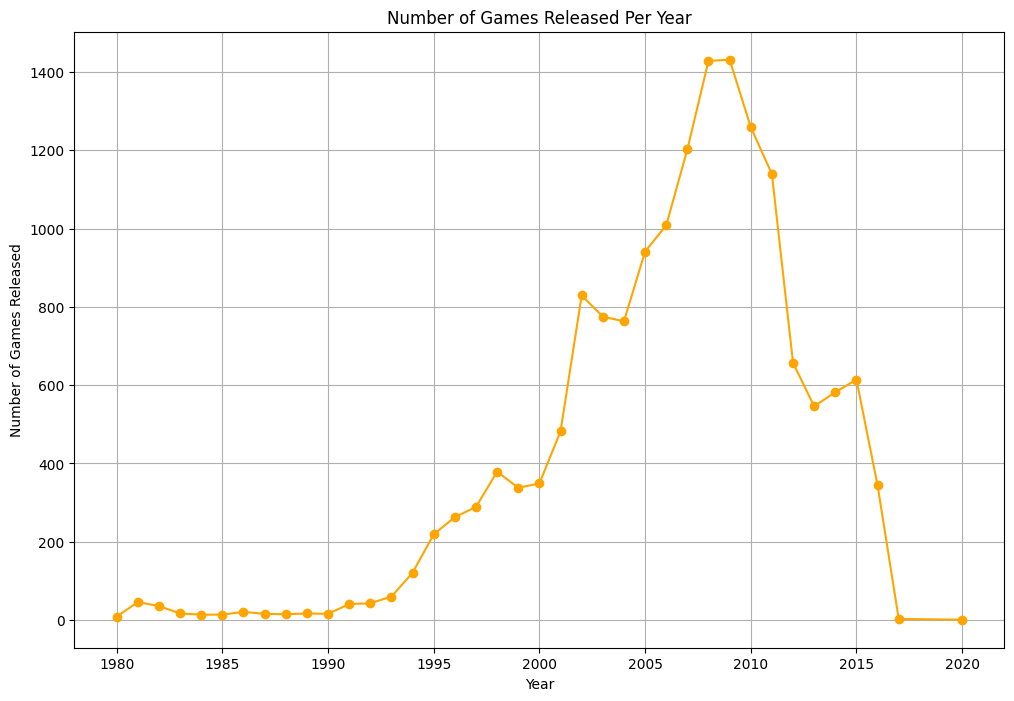

In [13]:
#Plot 3: Matplotlib ine plot
#Number of games released per year
data = data.dropna(subset=["Year"])
data["Year"] = data["Year"].astype(int)


games_per_year = data["Year"].value_counts().sort_index()

plt.figure(figsize=(12, 8))
plt.plot(games_per_year.index, games_per_year.values, marker='o', color="orange")
plt.xlabel("Year")
plt.ylabel("Number of Games Released")
plt.title("Number of Games Released Per Year")
plt.grid(True)

plt.show()

In [ ]:
#Description/Findings: Using this code the plot was able to represent the number of games released per year. As shown video games were
#On an rampant uptick as technology became more accessible. Eventually in the mid to late 2000's it hit it its peak before dwindling down.
#This may be for various reasons but a major proponent is the monopolization of the video game industry and smaller game studios being bought out or left unabe to compete.